### Importaci√≥n de datos



In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

In [89]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categor√≠a del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de env√≠o          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificaci√≥n            2359 non-null   int64  
 8   M√©todo de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [90]:
# Agregar nombre de tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los dataframes
df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [91]:
df_tiendas.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  Tienda 1  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  Tienda 1  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  Tienda 1  
3               Nequi                   1   3.43722 -76.52250  Tienda 1  
4               Nequi                   1   6.25184 -75.56359  Tienda 1

In [92]:
# N√∫mero de categor√≠as distintas
df_tiendas['Categor√≠a del Producto'].nunique()

8

In [93]:
# N√∫mero de productos distintos
df_tiendas['Producto'].nunique()

51

#1. An√°lisis de facturaci√≥n



In [94]:
# Ingreso total por tienda
ingresos = df_tiendas.groupby('Tienda')['Precio'].sum().reset_index()

# Mostrar formateado sin cambiar el DataFrame original
print("\nIngreso total por tienda:")
for _, row in ingresos.iterrows():
    print(f"{row['Tienda']}: ${row['Precio']:,.0f}")


Ingreso total por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


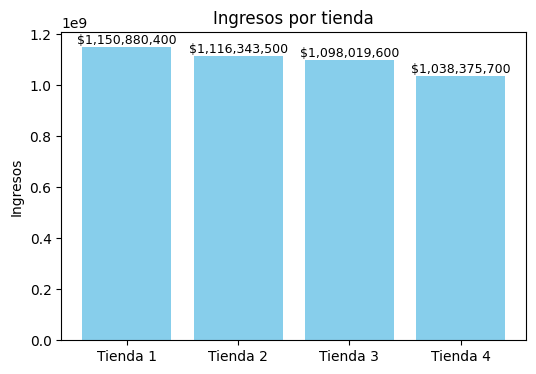

In [95]:
# Ingresos por tienda con valores arriba de las barras
plt.figure(figsize=(6,4))
bars = plt.bar(ingresos['Tienda'], ingresos['Precio'], color='skyblue')
plt.title('Ingresos por tienda')
plt.ylabel('Ingresos')

# Agregar etiquetas de valor sobre cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # posici√≥n horizontal centrada
        height,                           # posici√≥n vertical sobre la barra
        f"${height:,.0f}",                 # formato con $
        ha='center', va='bottom', fontsize=9
    )

plt.show()

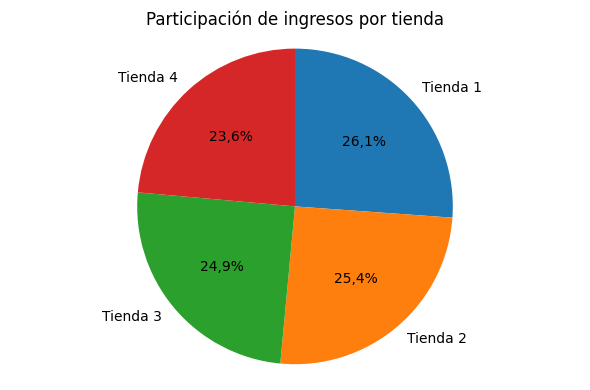

In [96]:
# Gr√°fico de torta: participaci√≥n de ingresos por tienda
labels = ingresos['Tienda']
sizes = ingresos['Precio'].values

fig, ax = plt.subplots(figsize=(6,4))
ax.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%'.replace('.', ','),  # porcentaje con coma
    startangle=90,
    counterclock=False
)
ax.set_title('Participaci√≥n de ingresos por tienda')
ax.axis('equal')  # c√≠rculo perfecto
plt.tight_layout()
plt.show()

# 2. Ventas por categor√≠a

In [97]:
# Contar cu√°ntos productos se vendieron por categor√≠a (todas las tiendas)
categorias_mas_vendidas = df_tiendas['Categor√≠a del Producto'].value_counts().reset_index()
categorias_mas_vendidas.columns = ['Categor√≠a del Producto', 'Cantidad Vendida']

# Mostrar la tabla
print("Categor√≠as m√°s vendidas (total general):")
print(categorias_mas_vendidas)

Categor√≠as m√°s vendidas (total general):
    Categor√≠a del Producto  Cantidad Vendida
0                  Muebles              1886
1             Electr√≥nicos              1772
2                 Juguetes              1290
3        Electrodom√©sticos              1149
4     Deportes y diversi√≥n              1113
5   Instrumentos musicales               753
6                   Libros               742
7  Art√≠culos para el hogar               730


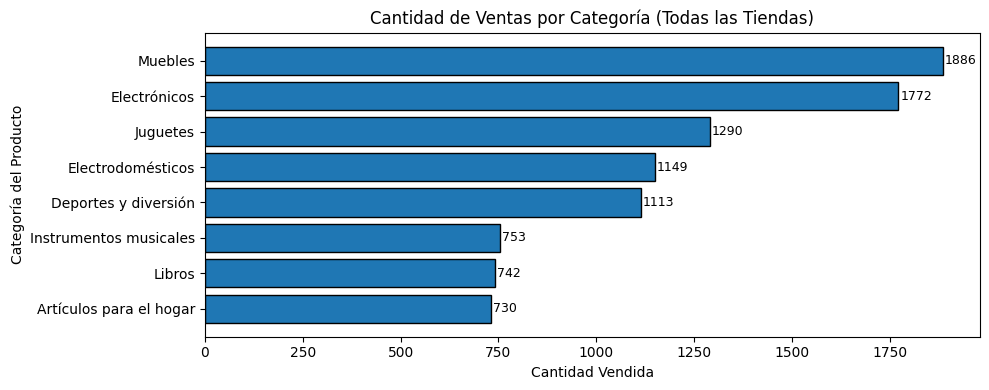

In [98]:
import matplotlib.pyplot as plt

# Gr√°fico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 4))
ax.barh(categorias_mas_vendidas['Categor√≠a del Producto'],
        categorias_mas_vendidas['Cantidad Vendida'],
        edgecolor='black')

# Estilo del gr√°fico
ax.set_title('Cantidad de Ventas por Categor√≠a (Todas las Tiendas)')
ax.set_xlabel('Cantidad Vendida')
ax.set_ylabel('Categor√≠a del Producto')

# Invertir el eje Y para que la categor√≠a con m√°s ventas quede arriba
ax.invert_yaxis()

# Etiquetas de valor al final de cada barra
for i, v in enumerate(categorias_mas_vendidas['Cantidad Vendida']):
    ax.text(v + 5, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [99]:
# Contar cu√°ntos productos se vendieron por categor√≠a y tienda
categorias_por_tienda = df_tiendas.groupby(['Tienda', 'Categor√≠a del Producto']).size().reset_index(name='Cantidad')

# Mostrar la tabla ordenada por tienda y cantidad
categorias_por_tienda = categorias_por_tienda.sort_values(by=['Tienda', 'Cantidad'], ascending=[True, False])

print("Cantidad Ventas por Categor√≠a por tienda:")
print(categorias_por_tienda)

Cantidad Ventas por Categor√≠a por tienda:
      Tienda   Categor√≠a del Producto  Cantidad
7   Tienda 1                  Muebles       465
3   Tienda 1             Electr√≥nicos       448
5   Tienda 1                 Juguetes       324
2   Tienda 1        Electrodom√©sticos       312
1   Tienda 1     Deportes y diversi√≥n       284
4   Tienda 1   Instrumentos musicales       182
6   Tienda 1                   Libros       173
0   Tienda 1  Art√≠culos para el hogar       171
15  Tienda 2                  Muebles       442
11  Tienda 2             Electr√≥nicos       422
13  Tienda 2                 Juguetes       313
10  Tienda 2        Electrodom√©sticos       305
9   Tienda 2     Deportes y diversi√≥n       275
12  Tienda 2   Instrumentos musicales       224
14  Tienda 2                   Libros       197
8   Tienda 2  Art√≠culos para el hogar       181
23  Tienda 3                  Muebles       499
19  Tienda 3             Electr√≥nicos       451
21  Tienda 3                 Juguet

In [100]:
# Calcular ingresos por tienda y categor√≠a
ingresos_por_tienda_cat = (
    df_tiendas
    .groupby(['Tienda', 'Categor√≠a del Producto'], as_index=False)['Precio']
    .sum()
    .rename(columns={'Precio': 'Ingresos'})
)

# Ordenar por tienda y por ingresos (descendente)
ingresos_por_tienda_cat = ingresos_por_tienda_cat.sort_values(
    by=['Tienda', 'Ingresos'], ascending=[True, False]
)

print("Ingresos por Categor√≠a y Tienda:")
print(ingresos_por_tienda_cat)


Ingresos por Categor√≠a y Tienda:
      Tienda   Categor√≠a del Producto     Ingresos
3   Tienda 1             Electr√≥nicos  429493500.0
2   Tienda 1        Electrodom√©sticos  363685200.0
7   Tienda 1                  Muebles  187633700.0
4   Tienda 1   Instrumentos musicales   91299000.0
1   Tienda 1     Deportes y diversi√≥n   39290000.0
5   Tienda 1                 Juguetes   17995700.0
0   Tienda 1  Art√≠culos para el hogar   12698400.0
6   Tienda 1                   Libros    8784900.0
11  Tienda 2             Electr√≥nicos  410831100.0
10  Tienda 2        Electrodom√©sticos  348567800.0
15  Tienda 2                  Muebles  176426300.0
12  Tienda 2   Instrumentos musicales  104990300.0
9   Tienda 2     Deportes y diversi√≥n   34744500.0
13  Tienda 2                 Juguetes   15945400.0
8   Tienda 2  Art√≠culos para el hogar   14746900.0
14  Tienda 2                   Libros   10091200.0
19  Tienda 3             Electr√≥nicos  410775800.0
18  Tienda 3        Electrodom√©sticos

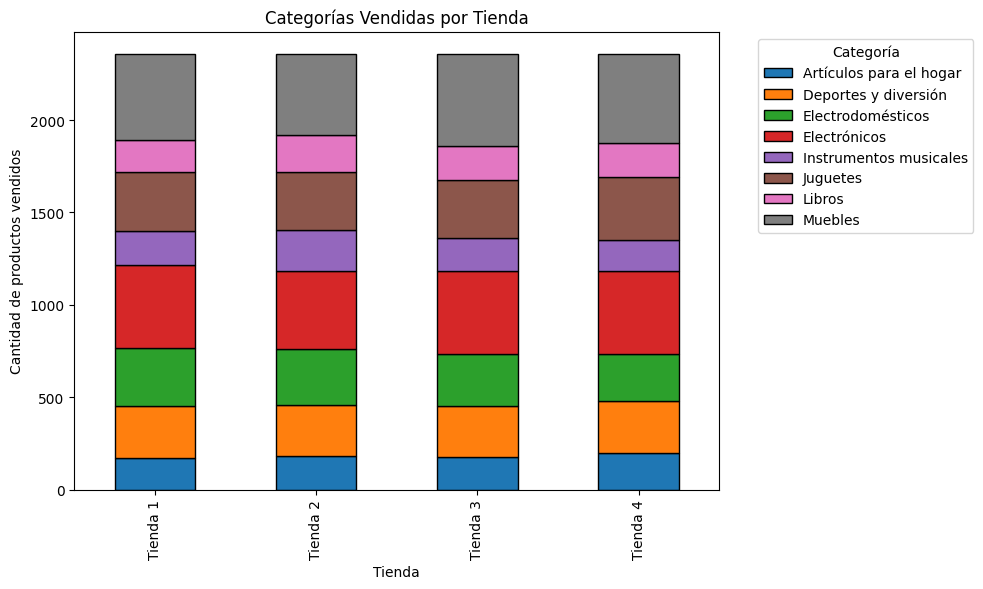

In [101]:
# Gr√°fico de barras apiladas
pivot_categorias.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black')

# Estilo del gr√°fico
plt.title('Categor√≠as Vendidas por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de productos vendidos')
plt.legend(title='Categor√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-335500628.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(TOP_N, 'Cantidad'))
/tmp/ipython-input-335500628.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nlargest(TOP_N, 'Ingresos'))


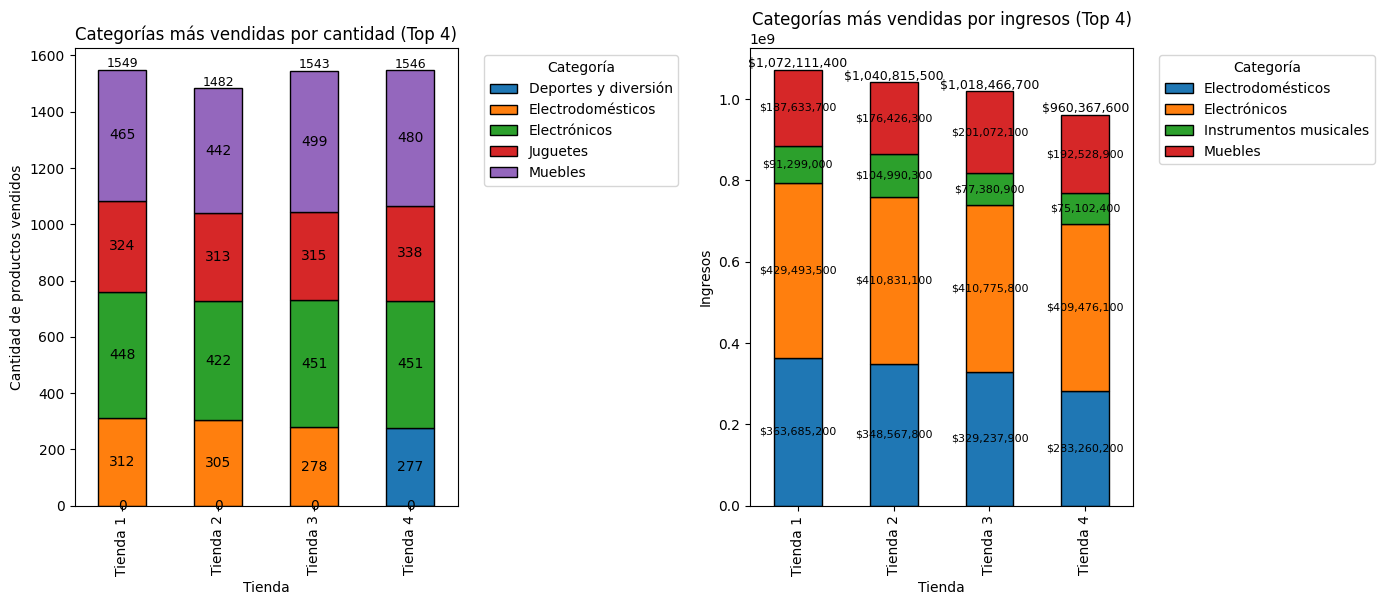

In [118]:
TOP_N = 4  # definir N

# --- Top N por CANTIDAD ---
categorias_top_cant = (categorias_por_tienda
                       .groupby('Tienda', group_keys=False)
                       .apply(lambda g: g.nlargest(TOP_N, 'Cantidad'))
                      )

pivot_cant = categorias_top_cant.pivot(index='Tienda',
                                       columns='Categor√≠a del Producto',
                                       values='Cantidad').fillna(0)

# --- Top N por INGRESOS ---
# Calcular ingresos por tienda y categor√≠a
ingresos_por_tienda_cat = (
    df_tiendas
    .groupby(['Tienda', 'Categor√≠a del Producto'], as_index=False)['Precio']
    .sum()
    .rename(columns={'Precio': 'Ingresos'})
)

categorias_top_ing = (ingresos_por_tienda_cat
                      .groupby('Tienda', group_keys=False)
                      .apply(lambda g: g.nlargest(TOP_N, 'Ingresos'))
                     )

pivot_ing = categorias_top_ing.pivot(index='Tienda',
                                     columns='Categor√≠a del Producto',
                                     values='Ingresos').fillna(0)

# --- Gr√°ficos lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Gr√°fico 1: Top N por cantidad
pivot_cant.plot(kind='bar', stacked=True, ax=axes[0], edgecolor='black')
axes[0].set_title(f'Categor√≠as m√°s vendidas por cantidad (Top {TOP_N})')
axes[0].set_xlabel('Tienda')
axes[0].set_ylabel('Cantidad de productos vendidos')
axes[0].legend(title='Categor√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
for container in axes[0].containers:
    axes[0].bar_label(container, label_type='center', fmt='%.0f')

totales_cant = pivot_cant.sum(axis=1).values
for i, total in enumerate(totales_cant):
    axes[0].text(i, total, f'{int(total)}', ha='center', va='bottom', fontsize=9)

# Gr√°fico 2: Top N por ingresos
pivot_ing.plot(kind='bar', stacked=True, ax=axes[1], edgecolor='black')
axes[1].set_title(f'Categor√≠as m√°s vendidas por ingresos (Top {TOP_N})')
axes[1].set_xlabel('Tienda')
axes[1].set_ylabel('Ingresos')
axes[1].legend(title='Categor√≠a', bbox_to_anchor=(1.05, 1), loc='upper left')
for container in axes[1].containers:
    axes[1].bar_label(container, labels=[f"${v:,.0f}" if v>0 else "" for v in container.datavalues],
                      label_type='center', fontsize=8)

totales_ing = pivot_ing.sum(axis=1).values
for i, total in enumerate(totales_ing):
    axes[1].text(i, total, f'${total:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 3. Calificaci√≥n promedio de la tienda


In [105]:
# Calcular el promedio de calificaciones por tienda
calificaciones_por_tienda = df_tiendas.groupby('Tienda')['Calificaci√≥n'].mean().reset_index()

# Renombrar columnas para claridad
calificaciones_por_tienda.columns = ['Tienda', 'Calificaci√≥n Promedio']

# Mostrar la tabla
print("Promedio de calificaciones por tienda:")
print(calificaciones_por_tienda)

Promedio de calificaciones por tienda:
     Tienda  Calificaci√≥n Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


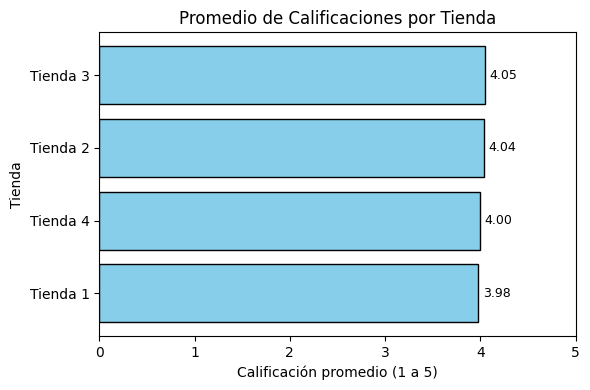

In [119]:
# Calcular el promedio de calificaciones por tienda y ordenar
calificaciones_por_tienda = (
    df_tiendas.groupby('Tienda')['Calificaci√≥n']
    .mean()
    .reset_index()
    .sort_values('Calificaci√≥n', ascending=False)
)

# Gr√°fico de barras horizontales
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.barh(calificaciones_por_tienda['Tienda'], calificaciones_por_tienda['Calificaci√≥n'],
               color='skyblue', edgecolor='black')

# Invertir eje Y para que el mayor quede arriba
ax.invert_yaxis()

# Etiquetas y estilo
ax.set_title('Promedio de Calificaciones por Tienda')
ax.set_xlabel('Calificaci√≥n promedio (1 a 5)')
ax.set_ylabel('Tienda')
ax.set_xlim(0, 5)

# Mostrar el valor a la derecha de la barra
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
            f"{width:.2f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Productos m√°s y menos vendidos

In [107]:
ventas_productos = df_tiendas.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad')
top_productos = ventas_productos.sort_values(['Tienda', 'Cantidad'], ascending=[True, False]).groupby('Tienda').head(5)
bottom_productos = ventas_productos.sort_values(['Tienda', 'Cantidad'], ascending=[True, True]).groupby('Tienda').head(5)

print("\nTop 5 productos m√°s vendidos por tienda:")
print(top_productos)

print("\nTop 5 productos menos vendidos por tienda:")
print(bottom_productos)


Top 5 productos m√°s vendidos por tienda:
       Tienda                   Producto  Cantidad
1    Tienda 1                    Armario        60
33   Tienda 1                 Microondas        60
48   Tienda 1              TV LED UHD 4K        60
40   Tienda 1           Secadora de ropa        58
9    Tienda 1    Bloques de construcci√≥n        56
75   Tienda 2  Iniciando en programaci√≥n        65
84   Tienda 2                 Microondas        62
58   Tienda 2                    Bater√≠a        61
72   Tienda 2          Guitarra ac√∫stica        58
89   Tienda 2                  Pandereta        58
129  Tienda 3              Kit de bancas        57
113  Tienda 3                  Cama king        56
133  Tienda 3            Mesa de comedor        56
134  Tienda 3              Mesa de noche        55
143  Tienda 3               Set de ollas        55
163  Tienda 4                   Cama box        62
168  Tienda 4                 Cuberter√≠a        59
164  Tienda 4                  Cam

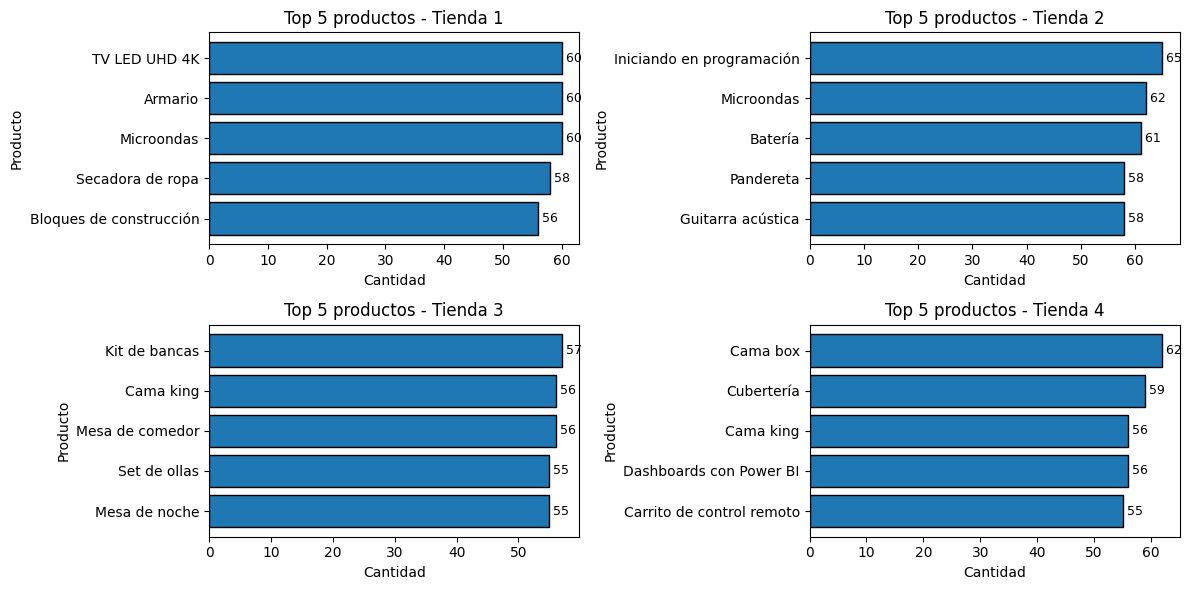

In [121]:
# Asegurar orden y tomar 5 por tienda
top5_por_tienda = (ventas_productos
                   .sort_values(['Tienda', 'Cantidad'], ascending=[True, False])
                   .groupby('Tienda')
                   .head(5))

tiendas = sorted(top5_por_tienda['Tienda'].unique())

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()

for i, tienda_name in enumerate(tiendas):
    ax = axes[i]
    sub = (top5_por_tienda[top5_por_tienda['Tienda'] == tienda_name]
           .sort_values('Cantidad', ascending=True))  # asc para que barh muestre el mayor arriba
    ax.barh(sub['Producto'], sub['Cantidad'], edgecolor='black')
    ax.set_title(f'Top 5 productos - {tienda_name}')
    ax.set_xlabel('Cantidad')
    ax.set_ylabel('Producto')

    # Etiquetas con valor al final de cada barra
    for j, (prod, val) in enumerate(zip(sub['Producto'], sub['Cantidad'])):
        ax.text(val, j, f' {int(val)}', va='center', ha='left', fontsize=9)

# Si por alguna raz√≥n hay menos de 4 tiendas, ocultar ejes sobrantes
for k in range(len(tiendas), 4):
    axes[k].axis('off')

plt.tight_layout()
plt.show()

# 5. Env√≠o promedio por tienda

In [109]:
# Calcular el costo de env√≠o promedio por tienda
envio_promedio_por_tienda = (
    df_tiendas.groupby('Tienda', as_index=False)['Costo de env√≠o']
    .mean()
    .sort_values(by='Costo de env√≠o', ascending=False)
)

# Mostrar tabla con separadores de miles para mejor lectura
envio_promedio_por_tienda['Costo de env√≠o'] = envio_promedio_por_tienda['Costo de env√≠o'].map(lambda x: f"${x:,.0f}")

print("Costo de env√≠o promedio por tienda:")
print(envio_promedio_por_tienda.to_string(index=False))


Costo de env√≠o promedio por tienda:
  Tienda Costo de env√≠o
Tienda 1        $26,019
Tienda 2        $25,216
Tienda 3        $24,806
Tienda 4        $23,459



# **Extra**

In [110]:
# Copia de trabajo
geo = df_tiendas.copy()

# Asegurar tipo num√©rico y filtrar coordenadas v√°lidas
for c in ['lat', 'lon', 'Precio']:
    if c in geo.columns:
        geo[c] = pd.to_numeric(geo[c], errors='coerce')

geo = geo.dropna(subset=['lat', 'lon'])
geo = geo[(geo['lat'].between(-90, 90)) & (geo['lon'].between(-180, 180))]

print(f"Registros con coordenadas v√°lidas: {len(geo):,}")
geo[['Tienda', 'lat', 'lon']].head()

Registros con coordenadas v√°lidas: 9,435


Tienda       lat       lon
0  Tienda 1   4.60971 -74.08175
1  Tienda 1   6.25184 -75.56359
2  Tienda 1  10.39972 -75.51444
3  Tienda 1   3.43722 -76.52250
4  Tienda 1   6.25184 -75.56359

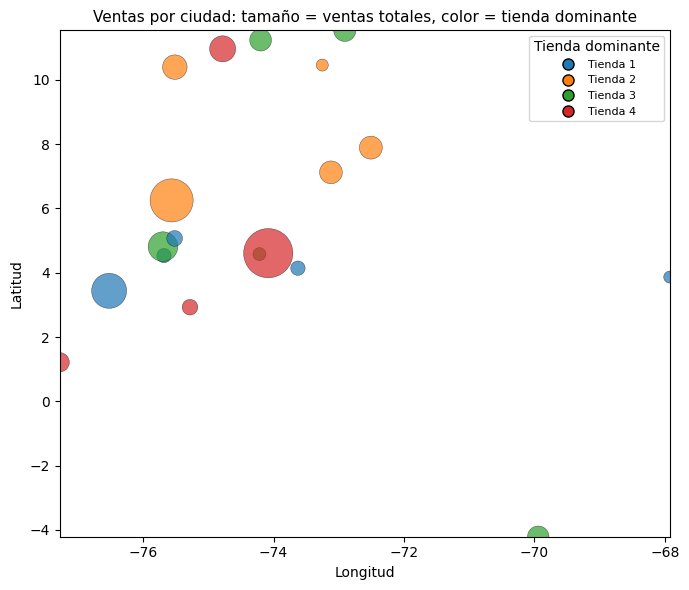

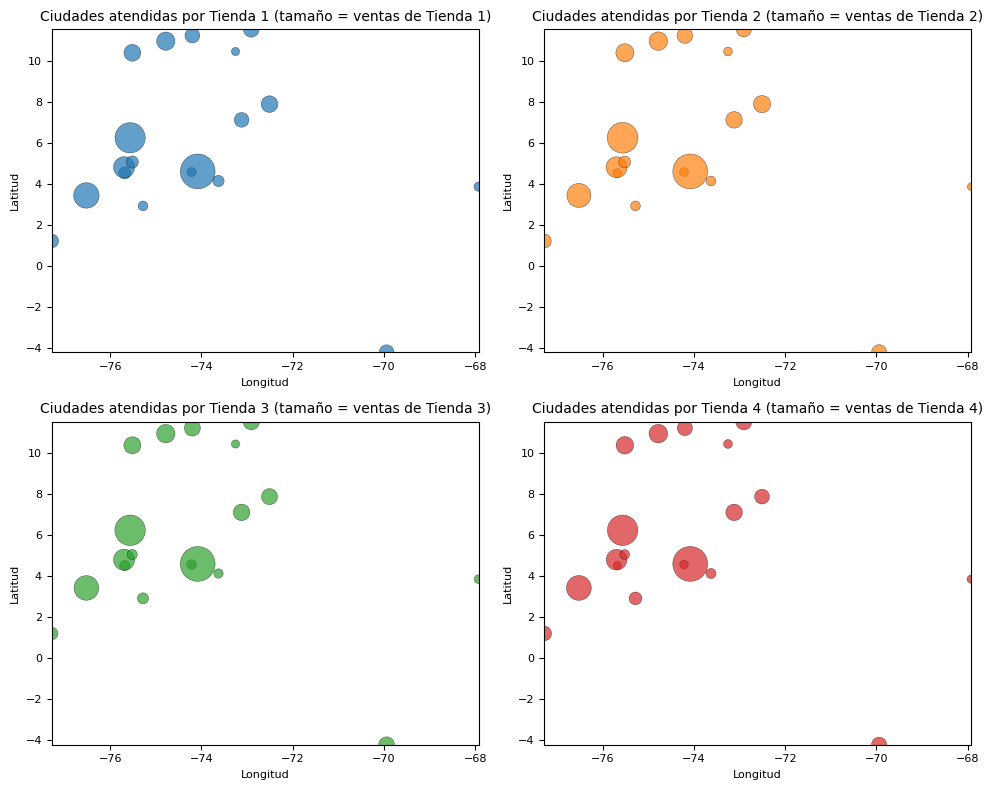

In [122]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- 1) Agregaciones por ciudad y tienda ---
# Ventas por ciudad (lat, lon) y tienda
ventas_por_ciudad = (
    geo.groupby(['lat', 'lon', 'Tienda'])
       .size()
       .reset_index(name='ventas')
)

# Ventas totales por ciudad (sumando todas las tiendas)
totales_ciudad = (ventas_por_ciudad
                  .groupby(['lat','lon'], as_index=False)['ventas']
                  .sum()
                  .rename(columns={'ventas':'ventas_totales'}))

# Tienda dominante por ciudad (la de mayor ventas en esa ciudad)
dom_ciudad = (ventas_por_ciudad
              .sort_values(['lat','lon','ventas'], ascending=[True, True, False])
              .drop_duplicates(['lat','lon'])
              .rename(columns={'Tienda':'Tienda_dominante', 'ventas':'ventas_dom'}))

# Dataset final para pintar: una fila por ciudad
plot_dom = (totales_ciudad
            .merge(dom_ciudad[['lat','lon','Tienda_dominante','ventas_dom']],
                   on=['lat','lon'], how='left'))

# --- 2) Mapa general: tama√±o = ventas totales en ciudad, color = tienda dominante ---
# Escala de tama√±o (ra√≠z para no tener burbujas gigantes)
sizes = np.sqrt(plot_dom['ventas_totales']) * 20  # ajusta 20 si quieres m√°s/menos tama√±o

# Paleta por tienda
tiendas = sorted(geo['Tienda'].unique())
cmap = plt.get_cmap('tab10')
color_map = {t: cmap(i % 10) for i, t in enumerate(tiendas)}
colors = plot_dom['Tienda_dominante'].map(color_map)

# L√≠mites comunes para comparaci√≥n
lon_min, lon_max = geo['lon'].min(), geo['lon'].max()
lat_min, lat_max = geo['lat'].min(), geo['lat'].max()

plt.figure(figsize=(7,6))
plt.scatter(plot_dom['lon'], plot_dom['lat'],
            s=sizes, c=colors, alpha=0.7,
            edgecolor='k', linewidths=0.3)

plt.title('Ventas por ciudad: tama√±o = ventas totales, color = tienda dominante', fontsize=11)
plt.xlabel('Longitud'); plt.ylabel('Latitud')
plt.xlim(lon_min, lon_max); plt.ylim(lat_min, lat_max)
plt.tight_layout()

# Leyenda de tiendas (colores)
legend_elements = [Line2D([0],[0], marker='o', linestyle='',
                          markerfacecolor=color_map[t], markeredgecolor='k',
                          markersize=8, label=t) for t in tiendas]
plt.legend(handles=legend_elements, title='Tienda dominante', loc='best', fontsize=8)
plt.show()

# --- 3) Subplots por tienda: tama√±o = ventas de esa tienda en cada ciudad ---
rows = int(np.ceil(len(tiendas)/2))
fig, axes = plt.subplots(rows, 2, figsize=(10, 4*rows))
axes = np.atleast_1d(axes).flatten()

for ax, t in zip(axes, tiendas):
    sub = ventas_por_ciudad[ventas_por_ciudad['Tienda'] == t].copy()
    sub_sizes = np.sqrt(sub['ventas']) * 20  # mismo escalado
    ax.scatter(sub['lon'], sub['lat'],
               s=sub_sizes, alpha=0.7,
               c=[color_map[t]]*len(sub),
               edgecolor='k', linewidths=0.3)
    ax.set_title(f'Ciudades atendidas por {t} (tama√±o = ventas de {t})', fontsize=10)
    ax.set_xlabel('Longitud', fontsize=8)
    ax.set_ylabel('Latitud', fontsize=8)
    ax.set_xlim(lon_min, lon_max); ax.set_ylim(lat_min, lat_max)
    ax.tick_params(axis='both', labelsize=8)

for k in range(len(tiendas), len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()


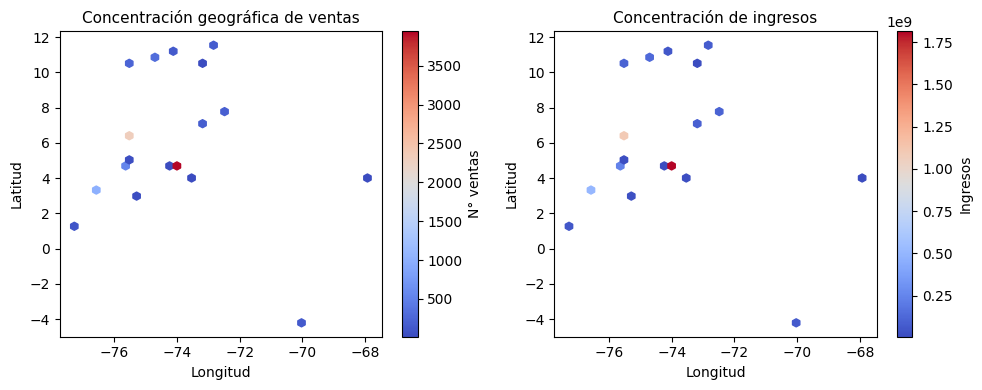

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Hexbin densidad de ventas
hb1 = axes[0].hexbin(geo['lon'], geo['lat'], gridsize=40, mincnt=1, cmap='coolwarm')
axes[0].set_title('Concentraci√≥n geogr√°fica de ventas', fontsize=11)
axes[0].set_xlabel('Longitud'); axes[0].set_ylabel('Latitud')
cb1 = fig.colorbar(hb1, ax=axes[0], orientation='vertical')
cb1.set_label('N¬∞ ventas')

# Hexbin densidad de ingresos
if 'Precio' in geo.columns:
    hb2 = axes[1].hexbin(geo['lon'], geo['lat'], C=geo['Precio'],
                         reduce_C_function=np.sum, gridsize=40, mincnt=1, cmap='coolwarm')
    axes[1].set_title('Concentraci√≥n de ingresos', fontsize=11)
    axes[1].set_xlabel('Longitud'); axes[1].set_ylabel('Latitud')
    cb2 = fig.colorbar(hb2, ax=axes[1], orientation='vertical')
    cb2.set_label('Ingresos')

plt.tight_layout()
plt.show()


In [113]:
# KPI con mayor peso a margen total
# 0) Limpieza
df = df_tiendas.copy()
for col in ['Precio', 'Costo de env√≠o', 'Calificaci√≥n']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['Precio', 'Costo de env√≠o', 'Calificaci√≥n'])

# 1) M√©trica de margen (proxy de rentabilidad por pedido)
df['Margen'] = df['Precio'] - df['Costo de env√≠o']

# 2) KPIs por tienda
kpi = df.groupby('Tienda').agg(
    Pedidos=('Producto', 'count'),
    Ingresos=('Precio', 'sum'),
    MargenTotal=('Margen', 'sum'),
    TicketPromedio=('Precio', 'mean'),
    CalificacionPromedio=('Calificaci√≥n', 'mean'),
    EnvioPromedio=('Costo de env√≠o', 'mean'),
).reset_index()

# 3) Normalizaci√≥n Min-Max (beneficios ‚Üë, costos ‚Üì)
def minmax(s):
    return (s - s.min())/(s.max() - s.min()) if s.max()!=s.min() else 1

kpi_norm = kpi.copy()
kpi_norm['Ingresos_n'] = minmax(kpi['Ingresos'])
kpi_norm['MargenTotal_n'] = minmax(kpi['MargenTotal'])
kpi_norm['TicketPromedio_n'] = minmax(kpi['TicketPromedio'])
kpi_norm['CalificacionPromedio_n'] = minmax(kpi['CalificacionPromedio'])
kpi_norm['EnvioPromedio_n'] = 1 - minmax(kpi['EnvioPromedio'])  # menor costo = mejor

# 4) Pesos del √çndice de Eficiencia (Ajustable)
pesos = {
    'MargenTotal_n': 0.45,     # peso principal: rentabilidad total
    'CalificacionPromedio_n': 0.20,  # satisfacci√≥n del cliente
    'TicketPromedio_n': 0.15,  # calidad del ingreso
    'Ingresos_n': 0.10,        # volumen bruto
    'EnvioPromedio_n': 0.10,   # eficiencia log√≠stica
}

# 5) C√°lculo del IE y ranking (mayor = mejor)
kpi_norm['IE'] = sum(kpi_norm[c]*w for c,w in pesos.items())
kpi_norm = kpi_norm.sort_values('IE', ascending=False).reset_index(drop=True)

# 6) Determinar tienda menos eficiente (para vender)
tienda_menos_eficiente = kpi_norm.iloc[-1]['Tienda']

print("KPIs por tienda:")
print(kpi.round(2).to_string(index=False))
print("\nPuntajes normalizados y IE:")
cols_out = ['Tienda','IE','Ingresos_n','MargenTotal_n','TicketPromedio_n','CalificacionPromedio_n','EnvioPromedio_n']
print(kpi_norm[cols_out].round(3).to_string(index=False))

print(f"\n‚û°Ô∏è Recomendaci√≥n: vender **{tienda_menos_eficiente}** (menor IE).")

# 7) Explicaci√≥n corta, destacando los 2 peores drivers de esa tienda
fila = kpi_norm[kpi_norm['Tienda']==tienda_menos_eficiente].iloc[0]
drivers = {
    'MargenTotal_n':'margen total',
    'CalificacionPromedio_n':'calificaci√≥n promedio',
    'TicketPromedio_n':'ticket promedio',
    'Ingresos_n':'ingresos',
    'EnvioPromedio_n':'costo de env√≠o',
}
peores = sorted(drivers.keys(), key=lambda c: fila[c])[:2]
print("Principales motivos:")
for p in peores:
    print(f" - Bajo desempe√±o relativo en {drivers[p]}.")


KPIs por tienda:
  Tienda  Pedidos     Ingresos  MargenTotal  TicketPromedio  CalificacionPromedio  EnvioPromedio
Tienda 1     2359 1150880400.0 1089502500.0       487867.91                  3.98       26018.61
Tienda 2     2359 1116343500.0 1056858400.0       473227.43                  4.04       25216.24
Tienda 3     2359 1098019600.0 1039503000.0       465459.77                  4.05       24805.68
Tienda 4     2358 1038375700.0  983058300.0       440362.89                  4.00       23459.46

Puntajes normalizados y IE:
  Tienda    IE  Ingresos_n  MargenTotal_n  TicketPromedio_n  CalificacionPromedio_n  EnvioPromedio_n
Tienda 1 0.700       1.000          1.000             1.000                   0.000            0.000
Tienda 2 0.686       0.693          0.693             0.692                   0.846            0.314
Tienda 3 0.618       0.530          0.530             0.528                   1.000            0.474
Tienda 4 0.153       0.000          0.000             0.000      

In [114]:
# KPI con mismo peso relativo por variable
# 0) Limpieza
df = df_tiendas.copy()
for col in ['Precio', 'Costo de env√≠o', 'Calificaci√≥n']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['Precio', 'Costo de env√≠o', 'Calificaci√≥n'])

# 1) M√©trica de margen (proxy de rentabilidad por pedido)
df['Margen'] = df['Precio'] - df['Costo de env√≠o']

# 2) KPIs por tienda
kpi = df.groupby('Tienda').agg(
    Pedidos=('Producto', 'count'),
    Ingresos=('Precio', 'sum'),
    MargenTotal=('Margen', 'sum'),
    TicketPromedio=('Precio', 'mean'),
    CalificacionPromedio=('Calificaci√≥n', 'mean'),
    EnvioPromedio=('Costo de env√≠o', 'mean'),
).reset_index()

# 3) Normalizaci√≥n Min-Max (beneficios ‚Üë, costos ‚Üì)
def minmax(s):
    return (s - s.min())/(s.max() - s.min()) if s.max()!=s.min() else 1

kpi_norm = kpi.copy()
kpi_norm['Ingresos_n'] = minmax(kpi['Ingresos'])
kpi_norm['MargenTotal_n'] = minmax(kpi['MargenTotal'])
kpi_norm['TicketPromedio_n'] = minmax(kpi['TicketPromedio'])
kpi_norm['CalificacionPromedio_n'] = minmax(kpi['CalificacionPromedio'])
kpi_norm['EnvioPromedio_n'] = 1 - minmax(kpi['EnvioPromedio'])  # menor costo = mejor

# 4) Pesos del √çndice de Eficiencia (Ajustable)
pesos = {
    'MargenTotal_n': 0.2,     # peso principal: rentabilidad total
    'CalificacionPromedio_n': 0.20,  # satisfacci√≥n del cliente
    'TicketPromedio_n': 0.2,  # calidad del ingreso
    'Ingresos_n': 0.2,        # volumen bruto
    'EnvioPromedio_n': 0.2,   # eficiencia log√≠stica
}

# 5) C√°lculo del IE y ranking (mayor = mejor)
kpi_norm['IE'] = sum(kpi_norm[c]*w for c,w in pesos.items())
kpi_norm = kpi_norm.sort_values('IE', ascending=False).reset_index(drop=True)

# 6) Determinar tienda menos eficiente (para vender)
tienda_menos_eficiente = kpi_norm.iloc[-1]['Tienda']

print("KPIs por tienda:")
print(kpi.round(2).to_string(index=False))
print("\nPuntajes normalizados y IE:")
cols_out = ['Tienda','IE','Ingresos_n','MargenTotal_n','TicketPromedio_n','CalificacionPromedio_n','EnvioPromedio_n']
print(kpi_norm[cols_out].round(3).to_string(index=False))

print(f"\n‚û°Ô∏è Recomendaci√≥n: vender **{tienda_menos_eficiente}** (menor IE).")

# 7) Explicaci√≥n corta, destacando los 2 peores drivers de esa tienda
fila = kpi_norm[kpi_norm['Tienda']==tienda_menos_eficiente].iloc[0]
drivers = {
    'MargenTotal_n':'margen total',
    'CalificacionPromedio_n':'calificaci√≥n promedio',
    'TicketPromedio_n':'ticket promedio',
    'Ingresos_n':'ingresos',
    'EnvioPromedio_n':'costo de env√≠o',
}
peores = sorted(drivers.keys(), key=lambda c: fila[c])[:2]
print("Principales motivos:")
for p in peores:
    print(f" - Bajo desempe√±o relativo en {drivers[p]}.")


KPIs por tienda:
  Tienda  Pedidos     Ingresos  MargenTotal  TicketPromedio  CalificacionPromedio  EnvioPromedio
Tienda 1     2359 1150880400.0 1089502500.0       487867.91                  3.98       26018.61
Tienda 2     2359 1116343500.0 1056858400.0       473227.43                  4.04       25216.24
Tienda 3     2359 1098019600.0 1039503000.0       465459.77                  4.05       24805.68
Tienda 4     2358 1038375700.0  983058300.0       440362.89                  4.00       23459.46

Puntajes normalizados y IE:
  Tienda    IE  Ingresos_n  MargenTotal_n  TicketPromedio_n  CalificacionPromedio_n  EnvioPromedio_n
Tienda 2 0.648       0.693          0.693             0.692                   0.846            0.314
Tienda 3 0.613       0.530          0.530             0.528                   1.000            0.474
Tienda 1 0.600       1.000          1.000             1.000                   0.000            0.000
Tienda 4 0.253       0.000          0.000             0.000      

# üìä Informe Final ‚Äì Evaluaci√≥n de Tiendas Alura Store

## üìù Introducci√≥n
El prop√≥sito de este an√°lisis es brindar al Sr. Juan una visi√≥n completa del desempe√±o de sus cuatro tiendas para determinar cu√°l vender y as√≠ financiar un nuevo emprendimiento.  
Se han evaluado m√∫ltiples aspectos del rendimiento comercial y operativo: **ingresos totales**, **composici√≥n de ventas por categor√≠a**, **calificaciones promedio de clientes**, **productos m√°s y menos vendidos**, **costos de env√≠o promedio** y un **√çndice de Eficiencia (IE)** que pondera por igual los indicadores clave.

---

## 1Ô∏è‚É£ Ingresos Totales
Entre las cuatro tiendas, la que presenta el **mayor ingreso total** es **Tienda 1**, mientras que la de **menor ingreso total** es **Tienda 4**.  
Las otras dos tiendas se ubican en un rango intermedio, con montos relativamente cercanos entre s√≠.  
Esta diferencia en ingresos refleja que no todas las tiendas tienen el mismo nivel de captaci√≥n de ventas, lo cual puede deberse a factores como ubicaci√≥n, surtido, estrategias de marketing o fidelidad de clientes.

---

## 2Ô∏è‚É£ Categor√≠as de Productos
En t√©rminos generales, las categor√≠as **Muebles**, **Electr√≥nicos** y **Juguetes** lideran las ventas globales.  
Sin embargo, no todas las tiendas tienen la misma fortaleza en estas categor√≠as:

- **Tienda 1** y **Tienda 2** concentran un volumen alto y consistente en categor√≠as l√≠deres.  
- **Tienda 4**, aunque mantiene presencia en ellas, muestra vol√∫menes e ingresos menores en comparaci√≥n.  

Esta menor fuerza en categor√≠as clave puede limitar su capacidad de competir frente a otras tiendas de la cadena.

---

## 3Ô∏è‚É£ Calificaci√≥n Promedio
Las calificaciones de los clientes var√≠an levemente entre las tiendas, con valores en el rango de **3,98 a 4,05** sobre 5.  

- **Tienda 2** y **Tienda 3** presentan las calificaciones m√°s altas, lo que sugiere una experiencia de compra m√°s satisfactoria o productos mejor valorados.  
- **Tienda 4** y **Tienda 1** tienen calificaciones apenas inferiores, pero a√∫n dentro de un rango aceptable.

---

## 4Ô∏è‚É£ Productos m√°s y menos vendidos
En todas las tiendas hay productos de alta rotaci√≥n que impulsan las ventas, pero tambi√©n existe inventario con ventas reducidas.  

- En **Tienda 4**, algunos productos de baja rotaci√≥n se concentran en categor√≠as relevantes, lo que puede afectar la eficiencia de su inventario.  
- **Tienda 1** y **Tienda 2**, en cambio, logran que sus productos m√°s vendidos se alineen con art√≠culos de alto valor para el cliente y con buena salida comercial.

---

## 5Ô∏è‚É£ Costos de Env√≠o Promedio
El costo log√≠stico promedio es m√°s bajo en **Tienda 4**, lo que en principio podr√≠a ser una ventaja.  
Sin embargo, este factor aislado no compensa las diferencias en ingresos, margen total y ticket promedio frente al resto de las tiendas.

---

## 6Ô∏è‚É£ √çndice de Eficiencia (IE)
El IE integra ingresos, margen total, ticket promedio, calificaci√≥n promedio y eficiencia log√≠stica.  

- **Tienda 2** encabeza el ranking, seguida de **Tienda 3** y **Tienda 1** con puntajes similares.  
- **Tienda 4** queda significativamente por debajo, penalizada especialmente por un margen total m√°s bajo y un ticket promedio inferior.

---

## üèÅ Conclusi√≥n y Recomendaci√≥n
El an√°lisis muestra que:

- **Tienda 1** es la de **mayores ingresos** y fuerte en categor√≠as clave.  
- **Tienda 2** y **Tienda 3** combinan buen ingreso, calificaci√≥n alta y desempe√±o equilibrado.  
- **Tienda 4** presenta el **menor ingreso**, menor margen total y ticket promedio, y una menor fortaleza en las categor√≠as l√≠deres, aunque con ventaja en costo de env√≠o.  

**‚úÖ Recomendaci√≥n:** Vender **Tienda 4**, ya que su desempe√±o global es inferior y su contribuci√≥n relativa a la cadena es la m√°s baja, mientras que el resto de las tiendas exhiben mejores perspectivas de crecimiento y rentabilidad.
